# This is a simple example of how to load and plot the provided data.

In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
# Load the data (update the path to the correct location)
data_path = "cse151b-spring2025-competition-data/processed_data_cse151b_v2_corrupted_ssp245/processed_data_cse151b_v2_corrupted_ssp245.zarr"
data = xr.open_zarr(data_path,decode_times=False)
data

<xarray.Dataset> Size: 621MB
Dimensions:    (ssp: 4, time: 1021, latitude: 48, longitude: 72, x: 72, y: 48,
                member_id: 3)
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * latitude   (latitude) float64 384B -89.05 -85.26 -81.47 ... 85.26 89.05
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
  * longitude  (longitude) float64 576B 1.25 6.25 11.25 ... 346.2 351.2 356.2
  * member_id  (member_id) int64 24B 0 1 2
  * ssp        (ssp) <U6 96B 'ssp126' 'ssp245' 'ssp370' 'ssp585'
  * time       (time) int64 8kB 0 31 59 90 120 ... 30903 30933 30964 30994 31025
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Data variables:
    BC         (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    CH4        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    CO2        (ssp, time) float64 33kB dask.array<chunksize=(1, 24), meta=np.ndarray>
    SO2        (ssp, time, latitude, longitude) float64 113MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    pr         (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
    rsdt       (ssp, time, y, x) float32 56MB dask.array<chunksize=(1, 24, 48, 72), meta=np.ndarray>
    tas        (ssp, time, member_id, y, x) float32 169MB dask.array<chunksize=(1, 24, 1, 48, 72), meta=np.ndarray>
Attributes:
    original_member_ids:  ['r10i1p1f1', 'r11i1p1f1', 'r4i1p1f1']
    precipitation_units:  mm/day (converted from kg m-2 s-1)
    source:               CMIP6 data processed for CSE151B
    ssp:                  ssp126

## Plot a few snapshots of temperature and precipitation (first, middle, and last)

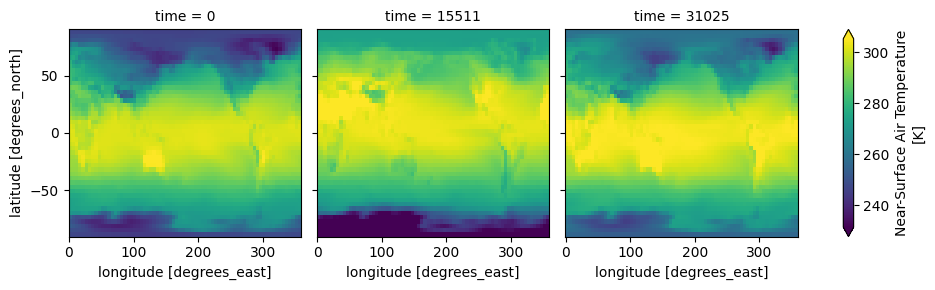

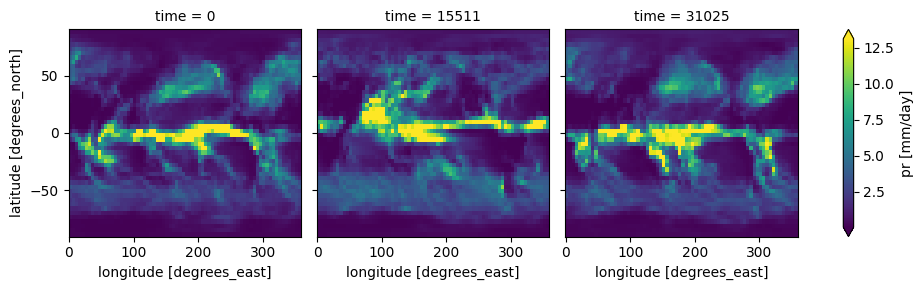

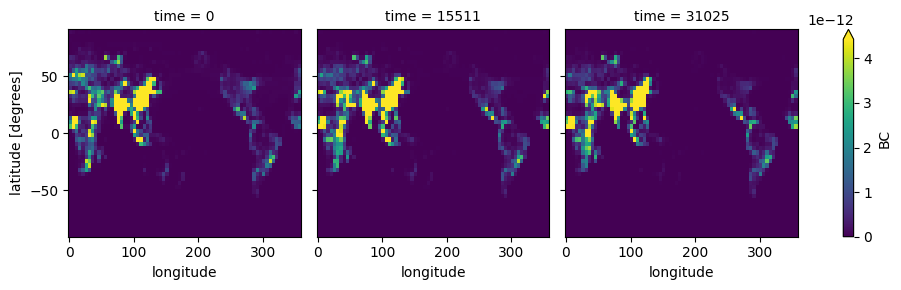

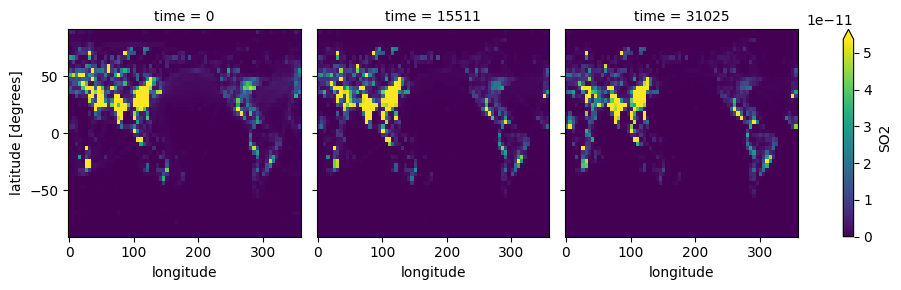

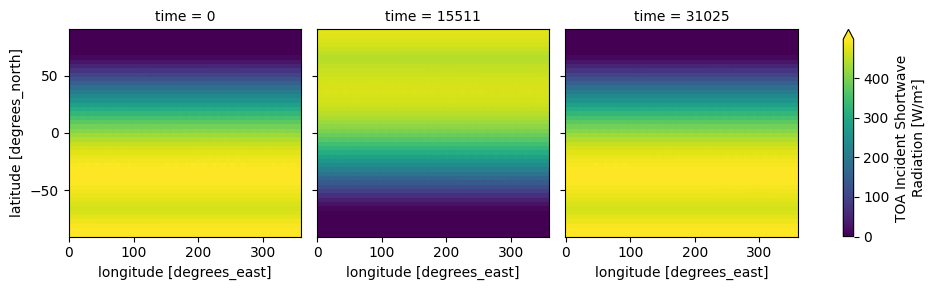

In [46]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)
data_subset.BC.plot(col="time", x="longitude", y="latitude", robust=True)
data_subset.SO2.plot(col="time", x="longitude", y="latitude", robust=True)
data_subset.rsdt.plot(col="time", x="x", y="y", robust=True)

In [17]:
data_subset.tas

<xarray.DataArray 'tas' (time: 3, y: 48, x: 72)> Size: 41kB
dask.array<getitem, shape=(3, 48, 72), dtype=float32, chunksize=(3, 48, 72), chunktype=numpy.ndarray>
Coordinates:
    lat        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
    lon        (x, y) float64 28kB dask.array<chunksize=(72, 48), meta=np.ndarray>
    member_id  int64 8B 0
    ssp        <U6 24B 'ssp370'
  * time       (time) int64 24B 0 15511 31025
  * x          (x) float64 576B 1.875 6.875 11.88 16.88 ... 346.9 351.9 356.9
  * y          (y) float64 384B -88.59 -84.82 -81.05 ... 81.05 84.82 88.59
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      day
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

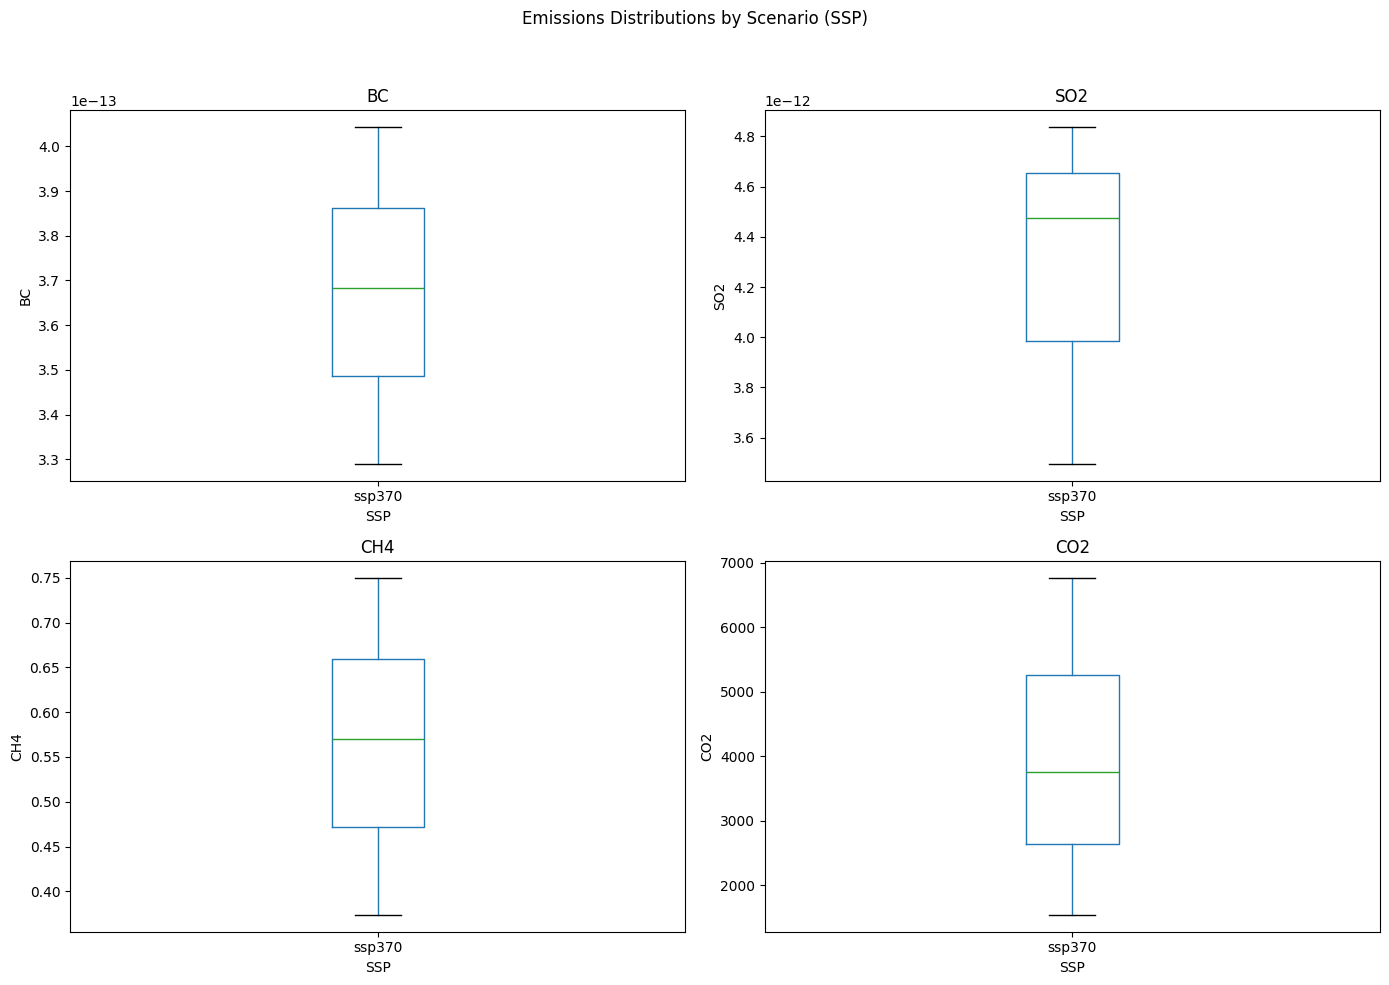

In [55]:
import matplotlib.pyplot as plt
import xarray as xr

# Collapse spatial dimensions for BC and SO2 (mean over lat/lon)
BC_mean = data_subset.BC.mean(dim=['latitude', 'longitude'])  # shape: (ssp, time)
SO2_mean = data_subset.SO2.mean(dim=['latitude', 'longitude'])  # shape: (ssp, time)

# Convert to DataFrames
bc_df = BC_mean.to_dataframe().reset_index()
so2_df = SO2_mean.to_dataframe().reset_index()
ch4_df = data_subset.CH4.to_dataframe().reset_index()
co2_df = data_subset.CO2.to_dataframe().reset_index()

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, df, col, title in zip(
    axes.flatten(),
    [bc_df, so2_df, ch4_df, co2_df],
    ['BC', 'SO2', 'CH4', 'CO2'],
    ['Black Carbon (BC)', 'Sulfur Dioxide (SO2)', 'Methane (CH4)', 'Carbon Dioxide (CO2)']
):
    ax.set_title(f'{title} Distribution by SSP')
    df.boxplot(column=col, by='ssp', ax=ax, grid=False)
    ax.set_ylabel(col)
    ax.set_xlabel("SSP")

plt.suptitle("Emissions Distributions by Scenario (SSP)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


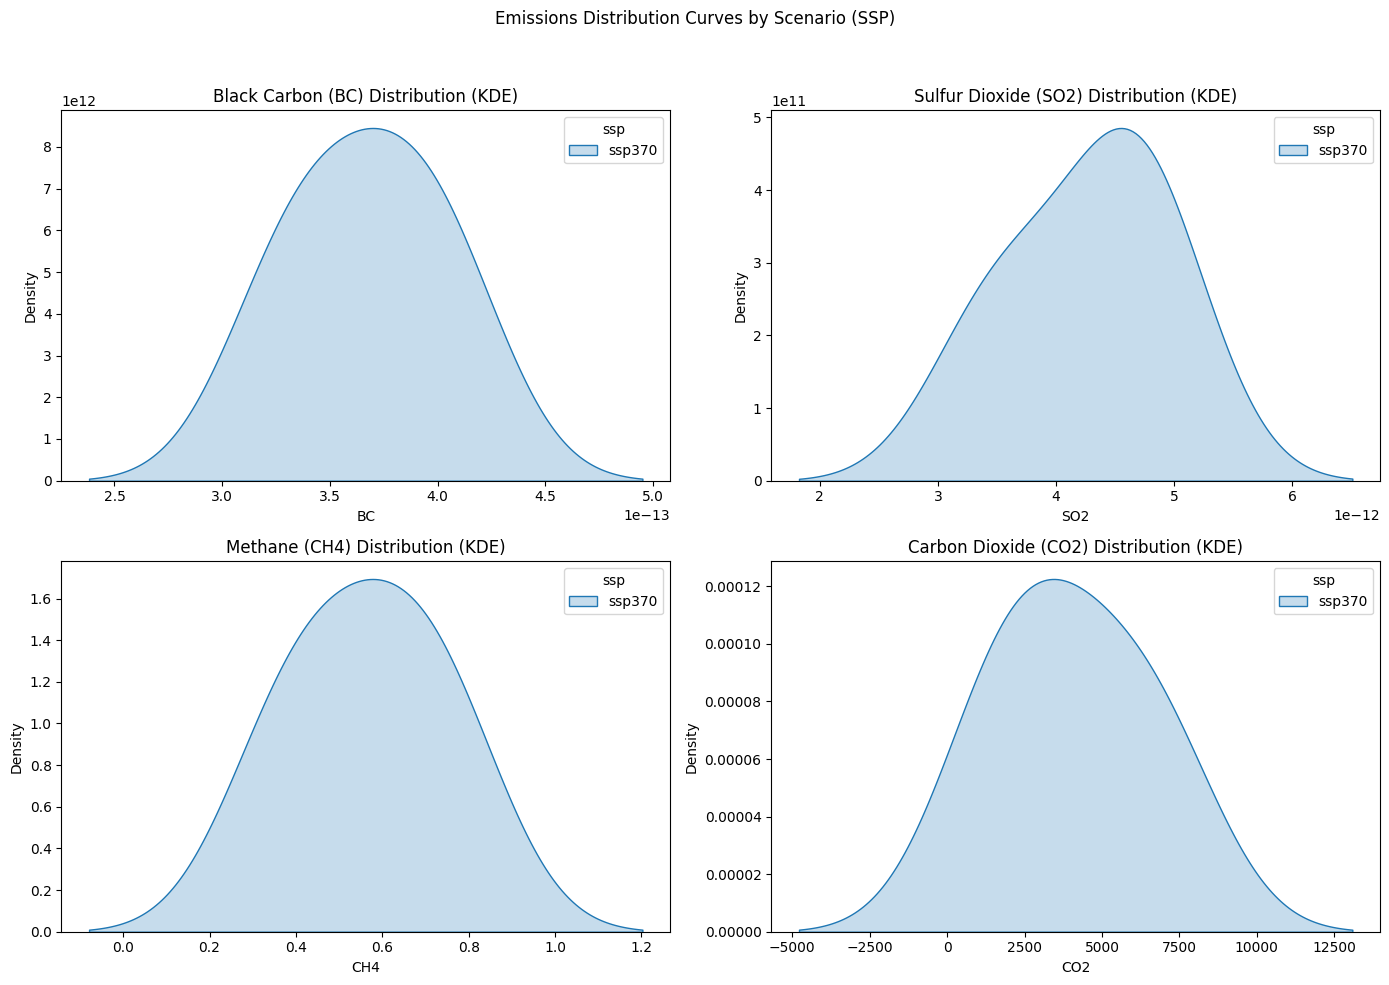

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

# Collapse spatial dimensions for BC and SO2 (mean over lat/lon)
BC_mean = data_subset.BC.mean(dim=['latitude', 'longitude'])  # shape: (ssp, time)
SO2_mean = data_subset.SO2.mean(dim=['latitude', 'longitude'])  # shape: (ssp, time)

# Convert to DataFrames
bc_df = BC_mean.to_dataframe().reset_index()
so2_df = SO2_mean.to_dataframe().reset_index()
ch4_df = data_subset.CH4.to_dataframe().reset_index()
co2_df = data_subset.CO2.to_dataframe().reset_index()

# Plot KDE plots for each variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, df, col, title in zip(
    axes.flatten(),
    [bc_df, so2_df, ch4_df, co2_df],
    ['BC', 'SO2', 'CH4', 'CO2'],
    ['Black Carbon (BC)', 'Sulfur Dioxide (SO2)', 'Methane (CH4)', 'Carbon Dioxide (CO2)']
):
    sns.kdeplot(data=df, x=col, hue='ssp', ax=ax, fill=True, common_norm=False)
    ax.set_title(f'{title} Distribution (KDE)')
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

plt.suptitle("Emissions Distribution Curves by Scenario (SSP)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


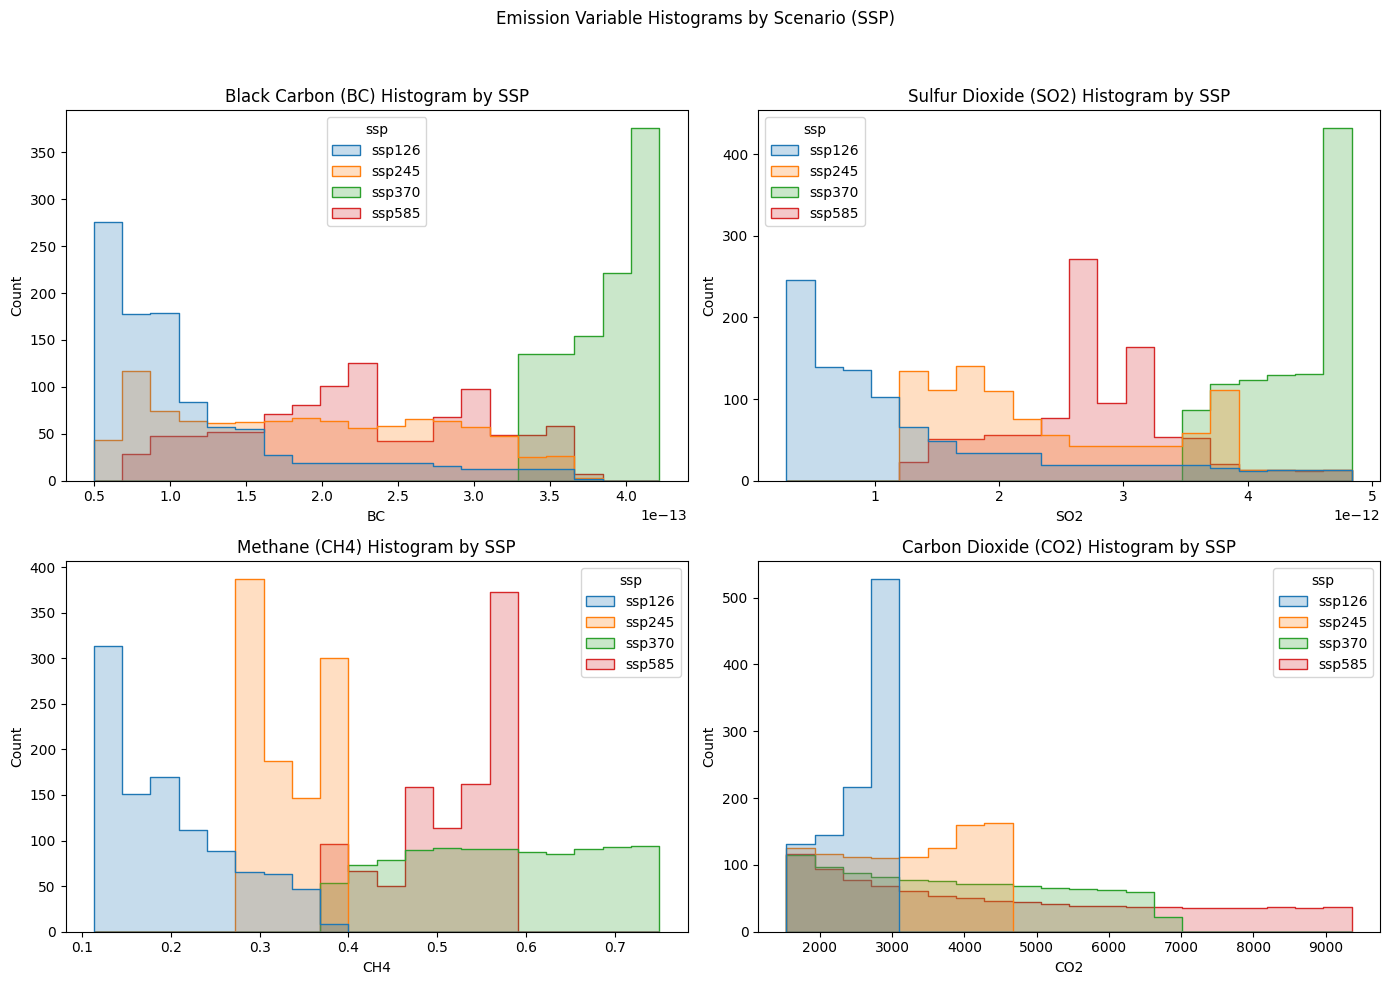

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collapse spatial dimensions for BC and SO2 (mean over lat/lon)
BC_mean = data.BC.mean(dim=['latitude', 'longitude'])  # (ssp, time)
SO2_mean = data.SO2.mean(dim=['latitude', 'longitude'])  # (ssp, time)

# Convert to DataFrames
bc_df = BC_mean.to_dataframe().reset_index()
so2_df = SO2_mean.to_dataframe().reset_index()
ch4_df = data.CH4.to_dataframe().reset_index()
co2_df = data.CO2.to_dataframe().reset_index()

# Plot histograms for each variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for ax, df, col, title in zip(
    axes.flatten(),
    [bc_df, so2_df, ch4_df, co2_df],
    ['BC', 'SO2', 'CH4', 'CO2'],
    ['Black Carbon (BC)', 'Sulfur Dioxide (SO2)', 'Methane (CH4)', 'Carbon Dioxide (CO2)']
):
    sns.histplot(data=df, x=col, hue='ssp', ax=ax, bins=20, kde=False, element='step', stat='count')
    ax.set_title(f'{title} Histogram by SSP')
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.suptitle("Emission Variable Histograms by Scenario (SSP)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [20]:
from geopy.geocoders import Nominatim
import pycountry_convert as pc

def latlon_to_continent(lat, lon):
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.reverse((lat, lon), language='en')
    if location is None:
        return None

    country_code = location.raw['address'].get('country_code', '').upper()
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return None

# Example
print(latlon_to_continent(48.8566, 2.3522))  # Paris → Europe


Europe


In [42]:
import geopandas as gpd
import xarray as xr
import numpy as np
from shapely.geometry import Point

# Load countries with continent info (from Natural Earth)
countries = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# countries has a 'CONTINENT' column, e.g. 'Asia', 'Europe', 'Africa'
print(countries.columns)  # verify 'CONTINENT' is there

# Prepare grid points as GeoDataFrame
lon_corrected = ((data_subset.x.values + 180) % 360) - 180

lon_vals, lat_vals = np.meshgrid(lon_corrected, data_subset.pr.y.values)  # (y,x)
flat_points = [Point(lon, lat) for lon, lat in zip(lon_vals.flatten(), lat_vals.flatten())]
points_gdf = gpd.GeoDataFrame(geometry=flat_points, crs="EPSG:4326")

# Spatial join points to countries to get continent
points_with_country = gpd.sjoin(points_gdf, countries[['geometry', 'CONTINENT']], how='left', predicate='within')

# Extract continent labels and reshape to grid
continent_labels = points_with_country['CONTINENT'].values.reshape(lat_vals.shape)
continent_labels = np.where(pd.isna(continent_labels), 'Oceans or Unaffiliated', continent_labels)
print(countries['CONTINENT'].unique())
print(np.unique(continent_labels))


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
['Oceania' 'Africa' 'North America' 'Asia' 'South America' 'Europe'
 'Seven seas (open ocean)' 'Antarctica']
['Africa' 'Antarctica' 'Asia' 'Europe' 'North America' 'Oceania'
 'Oceans or Unaffiliated' 'South America']


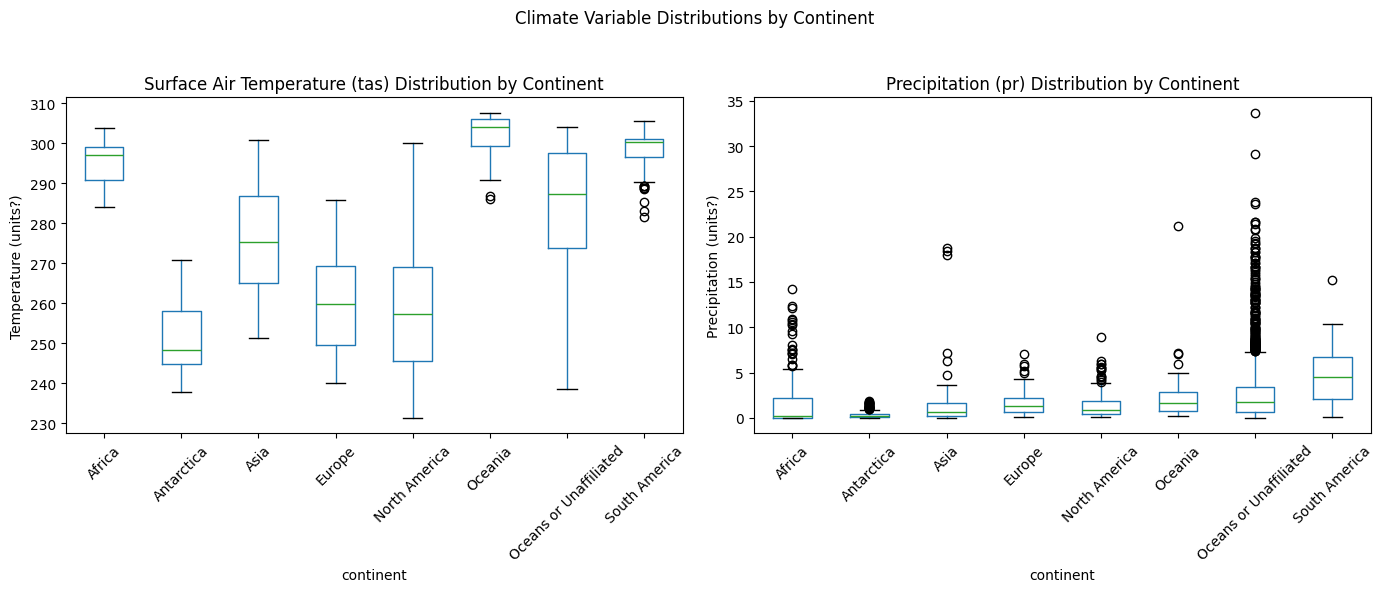

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Flatten data arrays (assuming data_subset.tas and data_subset.pr have dims (y, x))

tas_2d = data_subset.tas.isel(time=0).values  # shape (y,x)
pr_2d = data_subset.pr.isel(time=0).values    # shape (y,x)
tas_flat = tas_2d.flatten()
pr_flat = pr_2d.flatten()
BC_2d = data_subset.BC.isel(time=0).values  # shape (y,x)
SO2_2d = data_subset.SO2.isel(time=0).values    # shape (y,x)
BC_flat = BC_2d.flatten()
SO2_flat = SO2_2d.flatten()
# Flatten continent labels (already numpy array)
continent_flat = continent_labels.flatten()

# Create a DataFrame for easier grouping and plotting
df = pd.DataFrame({
    'continent': continent_flat,
    'tas': tas_flat,
    'pr': pr_flat,
    'SO2': SO2_flat,
    'BC' : BC_flat
})

# Remove rows where continent is 'Unknown' or data is NaN
df = df
df = df.dropna(subset=['tas', 'pr'])

# Plot distributions using boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Temperature distribution by continent
df.boxplot(column='tas', by='continent', ax=axes[0], grid=False, rot=45)
axes[0].set_title('Surface Air Temperature (tas) Distribution by Continent')
axes[0].set_ylabel('Temperature (units?)')

# Precipitation distribution by continent
df.boxplot(column='pr', by='continent', ax=axes[1], grid=False, rot=45)
axes[1].set_title('Precipitation (pr) Distribution by Continent')
axes[1].set_ylabel('Precipitation (units?)')

plt.suptitle('Climate Variable Distributions by Continent')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


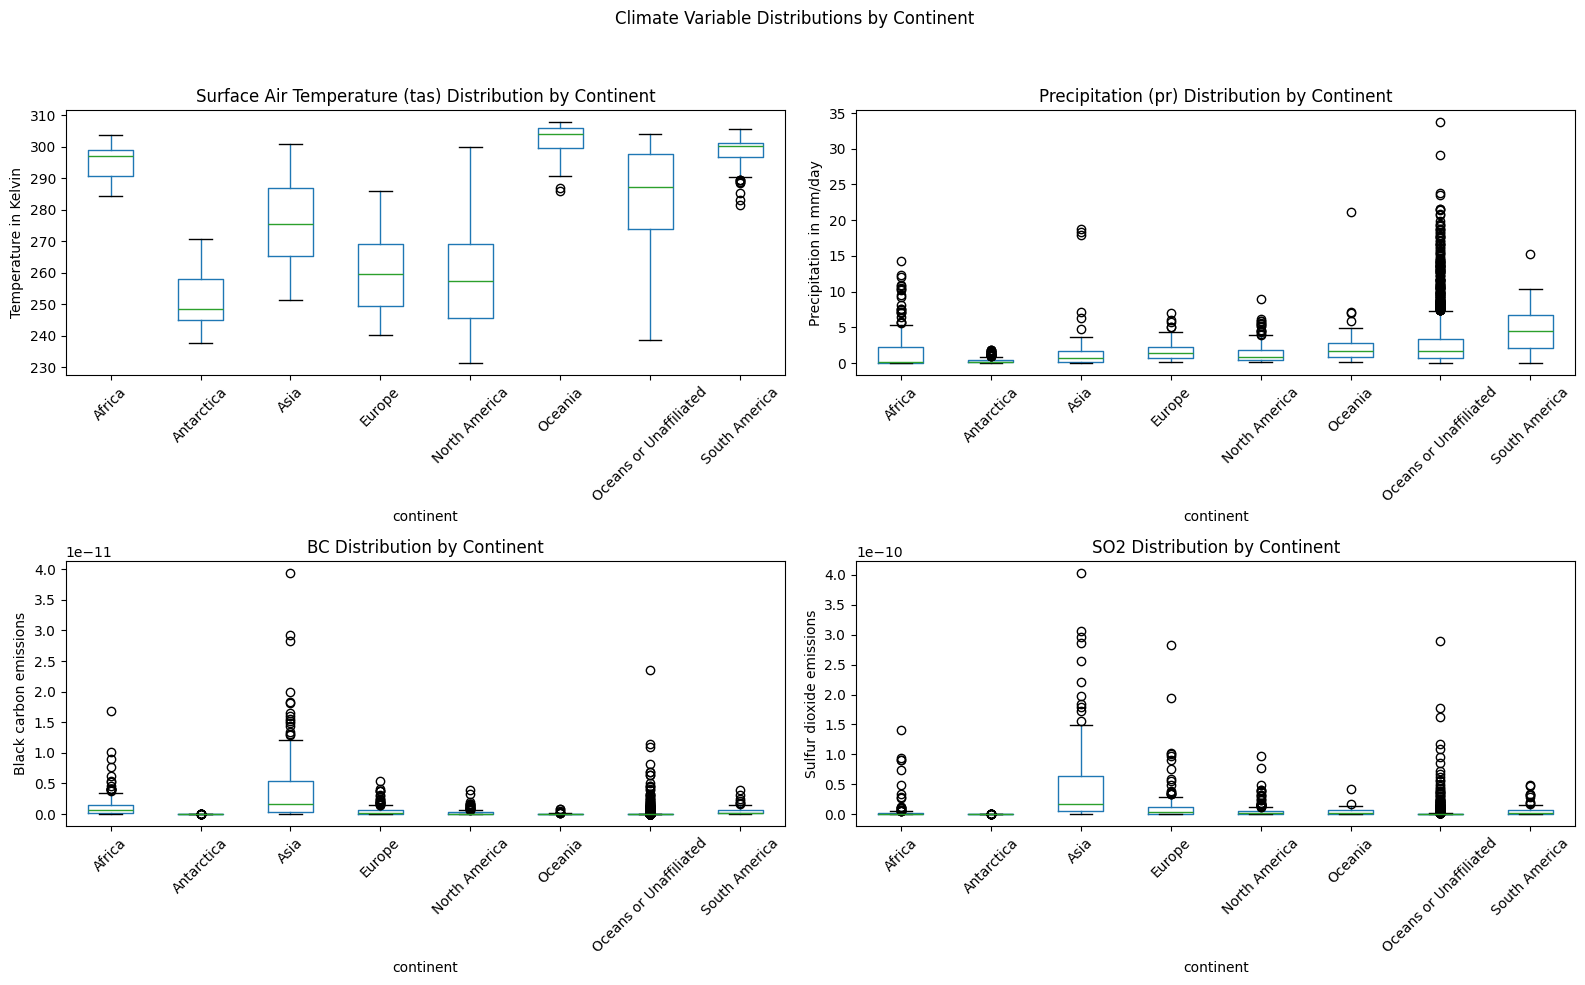

In [54]:
# Select the first ssp and time slice for BC and SO2, then get their numpy arrays
BC_2d = data_subset.BC.isel(time=0).values  # shape (latitude, longitude)
SO2_2d = data_subset.SO2.isel(time=0).values  # shape (latitude, longitude)

# Flatten them
BC_flat = BC_2d.flatten()
SO2_flat = SO2_2d.flatten()

# continent_labels is from your previous code (lat x lon) for tas/pr,
# ensure the spatial dims correspond to BC/SO2 dims!
# If the latitude and longitude order/dim differs, you might need to reorder or interpolate.

# Create DataFrame
df = pd.DataFrame({
    'continent': continent_flat,
    'tas': tas_flat,
    'pr': pr_flat,
    'BC': BC_flat,
    'SO2': SO2_flat
})

# Clean up NaNs and unknown continents
df = df.dropna(subset=['tas', 'pr', 'BC', 'SO2'])
df = df[df['continent'] != 'Unknown']

# Plotting all 4 variables with boxplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

df.boxplot(column='tas', by='continent', ax=axes[0,0], grid=False, rot=45)
axes[0,0].set_title('Surface Air Temperature (tas) Distribution by Continent')
axes[0,0].set_ylabel('Temperature in Kelvin')

df.boxplot(column='pr', by='continent', ax=axes[0,1], grid=False, rot=45)
axes[0,1].set_title('Precipitation (pr) Distribution by Continent')
axes[0,1].set_ylabel('Precipitation in mm/day')

df.boxplot(column='BC', by='continent', ax=axes[1,0], grid=False, rot=45)
axes[1,0].set_title('BC Distribution by Continent')
axes[1,0].set_ylabel('Black carbon emissions')

df.boxplot(column='SO2', by='continent', ax=axes[1,1], grid=False, rot=45)
axes[1,1].set_title('SO2 Distribution by Continent')
axes[1,1].set_ylabel('Sulfur dioxide emissions')

plt.suptitle('Climate Variable Distributions by Continent')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Plot the time series of global mean temperature and precipitation

Note that we do not plot the SSP245 scenario here, as it is corrupted in the provided data.

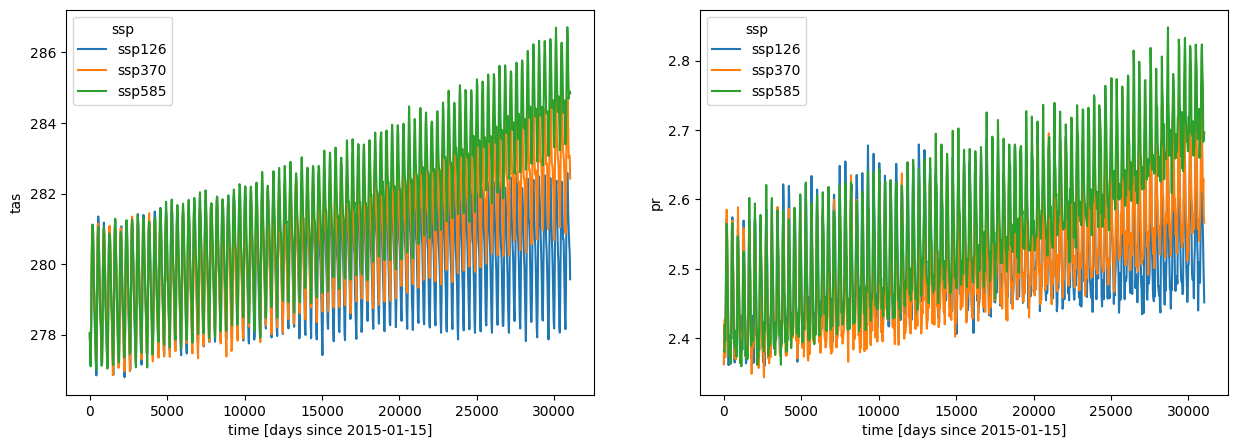

In [9]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])  # also average over all ensemble members
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean_data.tas.plot(label="Temperature", ax=ax[0], hue="ssp")
global_mean_data.pr.plot(label="Precipitation", ax=ax[1], hue="ssp")# Plot the time series of global mean temperature and precipitation

# Plot the (global mean) time series of climate forcings

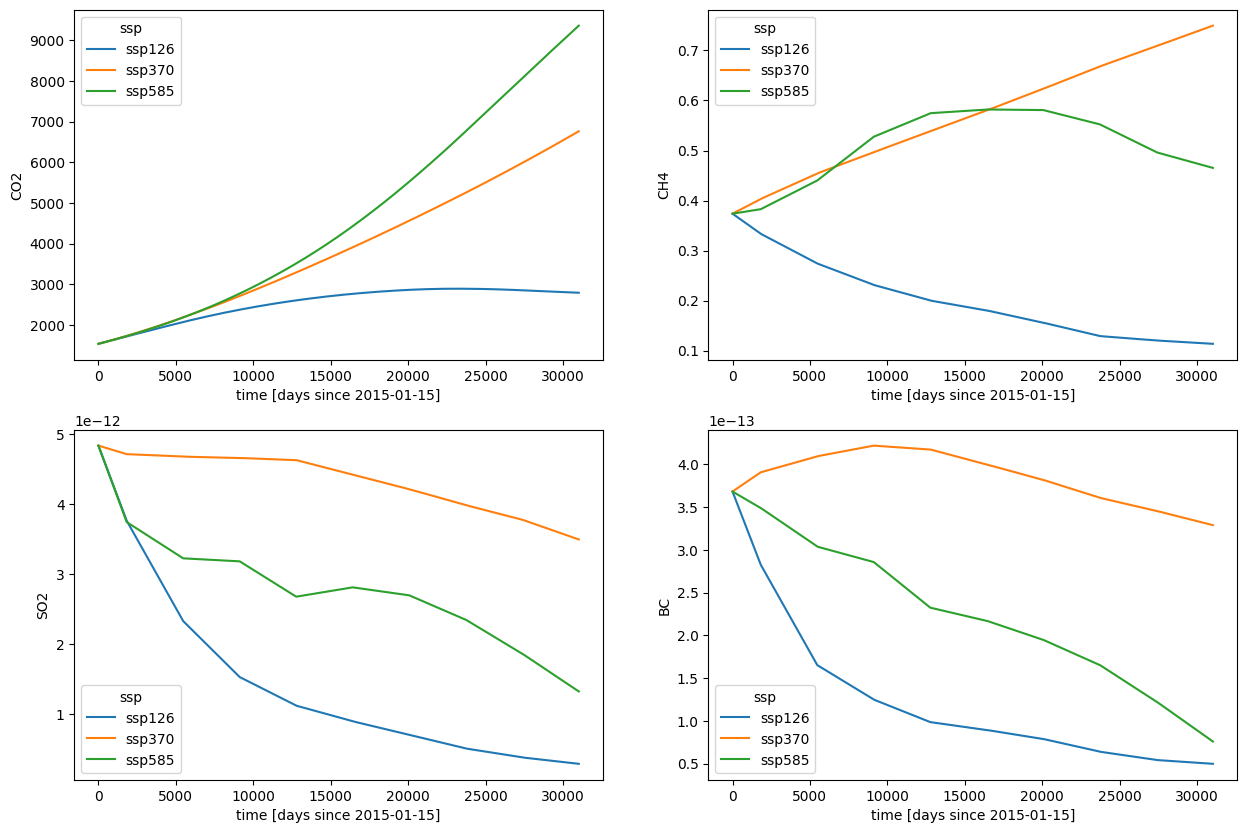

In [10]:
global_mean_data = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"]) 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
global_mean_data.CO2.plot(ax=axes[0], hue="ssp")
global_mean_data.CH4.plot(ax=axes[1], hue="ssp")
global_mean_data.SO2.plot(ax=axes[2], hue="ssp")
_ = global_mean_data.BC.plot(ax=axes[3], hue="ssp")

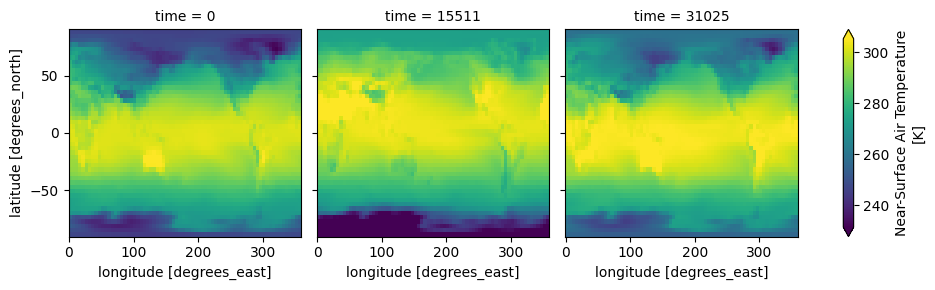

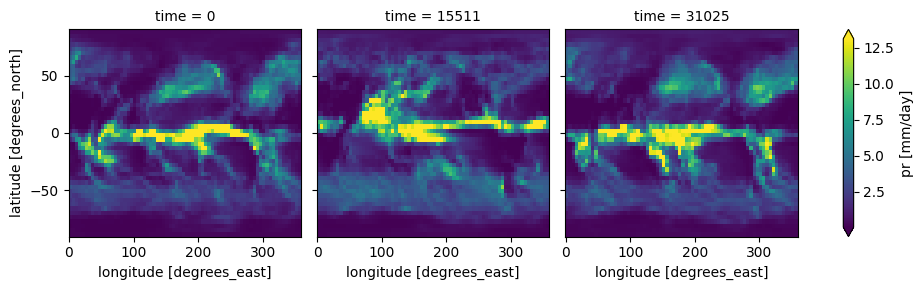

In [11]:
data_subset = data.isel(time=[0, data.time.size // 2, -1]).sel(ssp="ssp370", member_id=0)
data_subset.tas.plot(col="time", x="x", y="y", robust=True)
data_subset.pr.plot(col="time", x="x", y="y", robust=True)


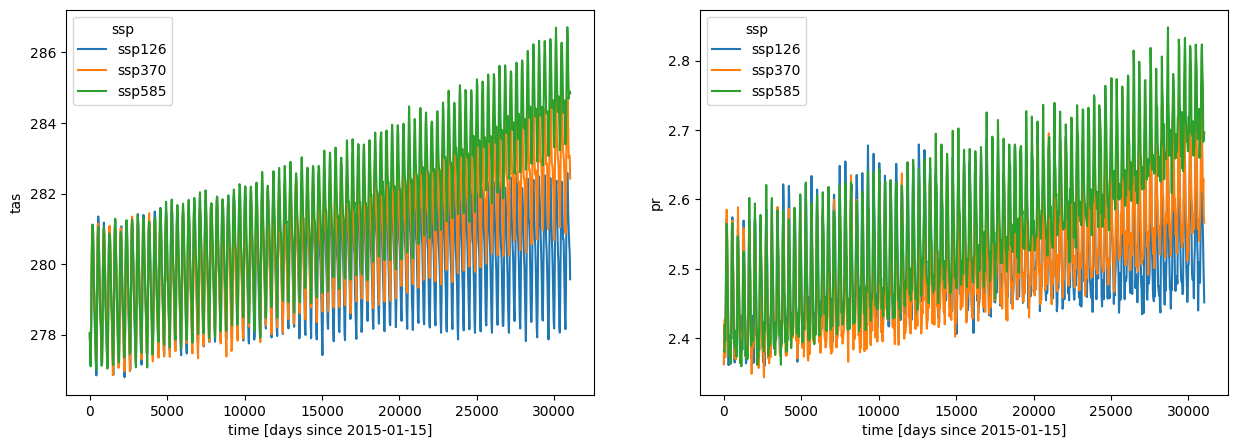

In [12]:
global_mean = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
global_mean.tas.plot(ax=ax[0], hue="ssp")
global_mean.pr.plot(ax=ax[1], hue="ssp")


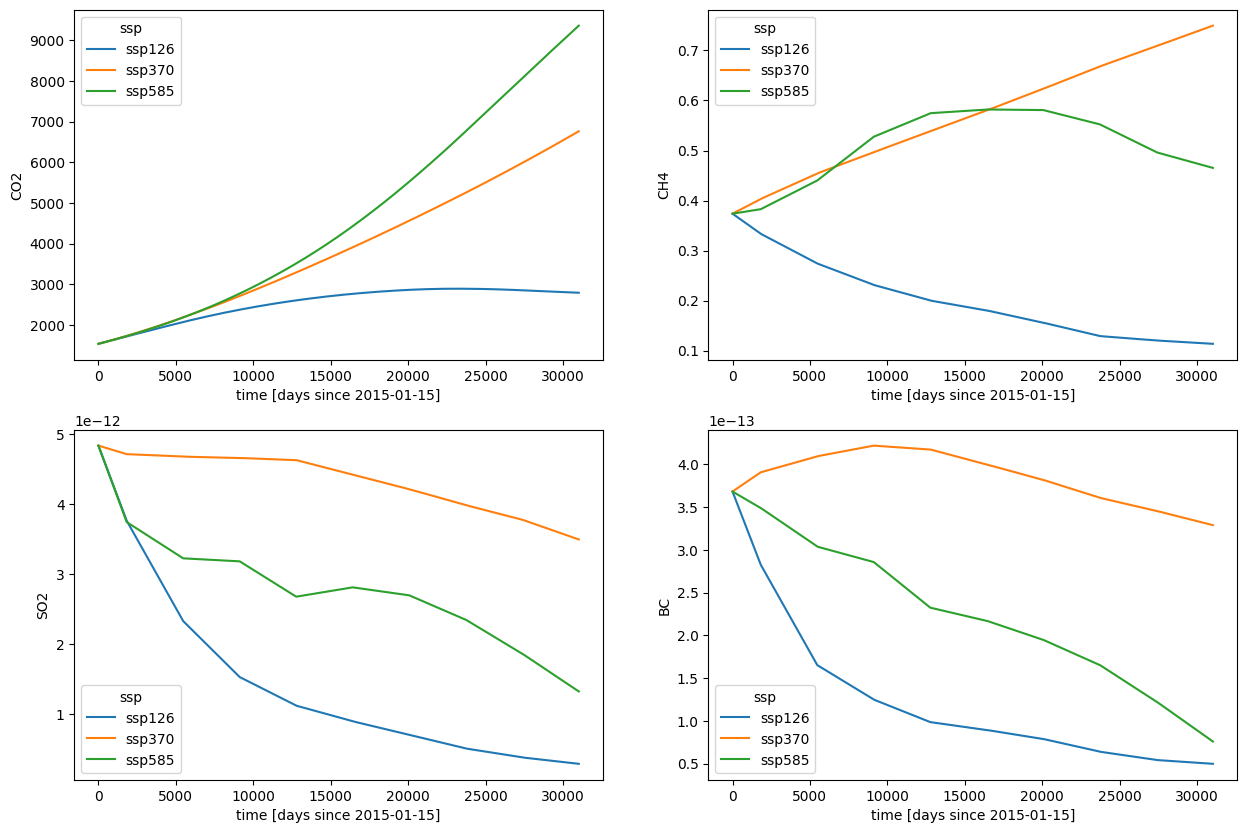

In [4]:
forcing_mean = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["longitude", "latitude", "member_id"])
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
forcing_mean.CO2.plot(ax=axes[0], hue="ssp")
forcing_mean.CH4.plot(ax=axes[1], hue="ssp")
forcing_mean.SO2.plot(ax=axes[2], hue="ssp")
forcing_mean.BC.plot(ax=axes[3], hue="ssp")


In [13]:
# Get time info
time_dim = data.coords["time"]
ssp_vals = list(data.ssp.values)

print(f"Total time steps: {len(time_dim.values)}")
print(f"Available SSPs: {ssp_vals}")

# Training SSPs
train_ssps = ["ssp126", "ssp370", "ssp585"]
test_ssp = "ssp245"

# Time range
print("Time range:", time_dim.values[0], "to", time_dim.values[-1])

# Shapes per scenario
for ssp in ssp_vals:
    tas_shape = data.sel(ssp=ssp).tas.shape
    print(f"{ssp} → tas shape: {tas_shape} [ssp, time, member_id, y, x]")


Total time steps: 1021
Available SSPs: ['ssp126', 'ssp245', 'ssp370', 'ssp585']
Time range: 0 to 31025
ssp126 → tas shape: (1021, 3, 48, 72) [ssp, time, member_id, y, x]
ssp245 → tas shape: (1021, 3, 48, 72) [ssp, time, member_id, y, x]
ssp370 → tas shape: (1021, 3, 48, 72) [ssp, time, member_id, y, x]
ssp585 → tas shape: (1021, 3, 48, 72) [ssp, time, member_id, y, x]


In [14]:
print("Latitude shape:", data.latitude.shape)
print("Longitude shape:", data.longitude.shape)
print("Grid resolution:", len(data.latitude), "lat ×", len(data.longitude), "lon")


Latitude shape: (48,)
Longitude shape: (72,)
Grid resolution: 48 lat × 72 lon


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Flatten across all dimensions except the variable itself
tas_all = data.tas.values.flatten()
pr_all = data.pr.values.flatten()

# Remove NaNs (if any)
tas_all = tas_all[~np.isnan(tas_all)]
pr_all = pr_all[~np.isnan(pr_all)]

# Plot distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(tas_all, bins=100, kde=True, color="orange")
plt.title("Surface Temperature (tas) Distribution (All SSPs, All Points)")
plt.xlabel("Temperature (K)")

plt.subplot(1, 2, 2)
sns.histplot(pr_all, bins=200, kde=True, color="skyblue")
plt.title("Precipitation (pr) Distribution (All SSPs, All Points)")
plt.xlabel("Precipitation (mm/day)")

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define input variable names
inputs = ["BC", "CH4", "CO2", "SO2"]

# Infer spatial dimensions
spatial_dims = [dim for dim in data.dims if dim in ["x", "y", "latitude", "longitude"]]

# Compute global means over spatial dimensions
input_means = {
    var: data[var].mean(dim=spatial_dims) for var in inputs
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

for i, var in enumerate(inputs):
    ax = axs[i]
    for ssp in input_means[var].ssp.values:
        ax.plot(input_means[var].time, input_means[var].sel(ssp=ssp), label=ssp)
    ax.set_title(f"Global Mean {var} Over Time")
    ax.set_xlabel("Year")
    ax.set_ylabel(var)
    ax.legend()

plt.tight_layout()
plt.show()


ValueError: 'latitude' not found in array dimensions ('ssp', 'time')

Train size: 2943 time steps
Validation size: 120 time steps
Test size: 1021 time steps
Spatial dimensions: x=72, y=48
TAS (train): mean=280.71, std=19.87
PR (train): mean=2.52, std=2.00


C:\Users\vinmo\AppData\Local\Temp\ipykernel_51328\4183161522.py:37: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  print(f"Spatial dimensions: x={data.dims['x']}, y={data.dims['y']}")


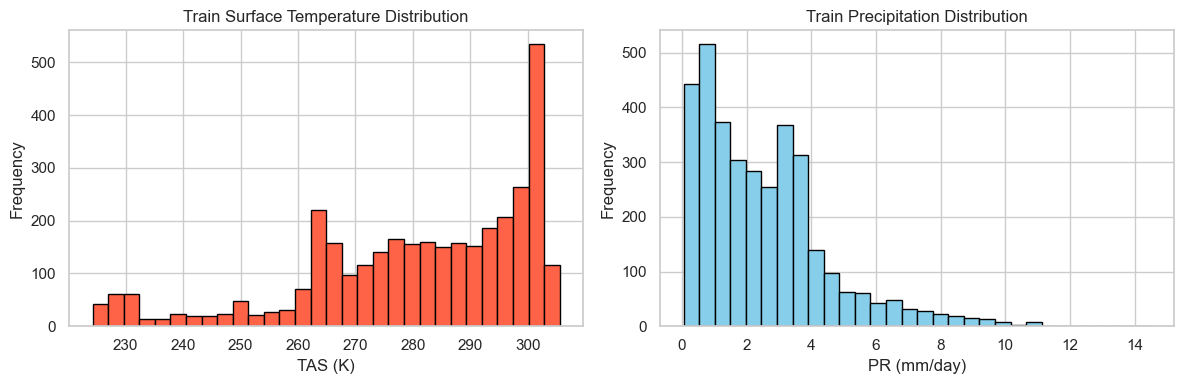

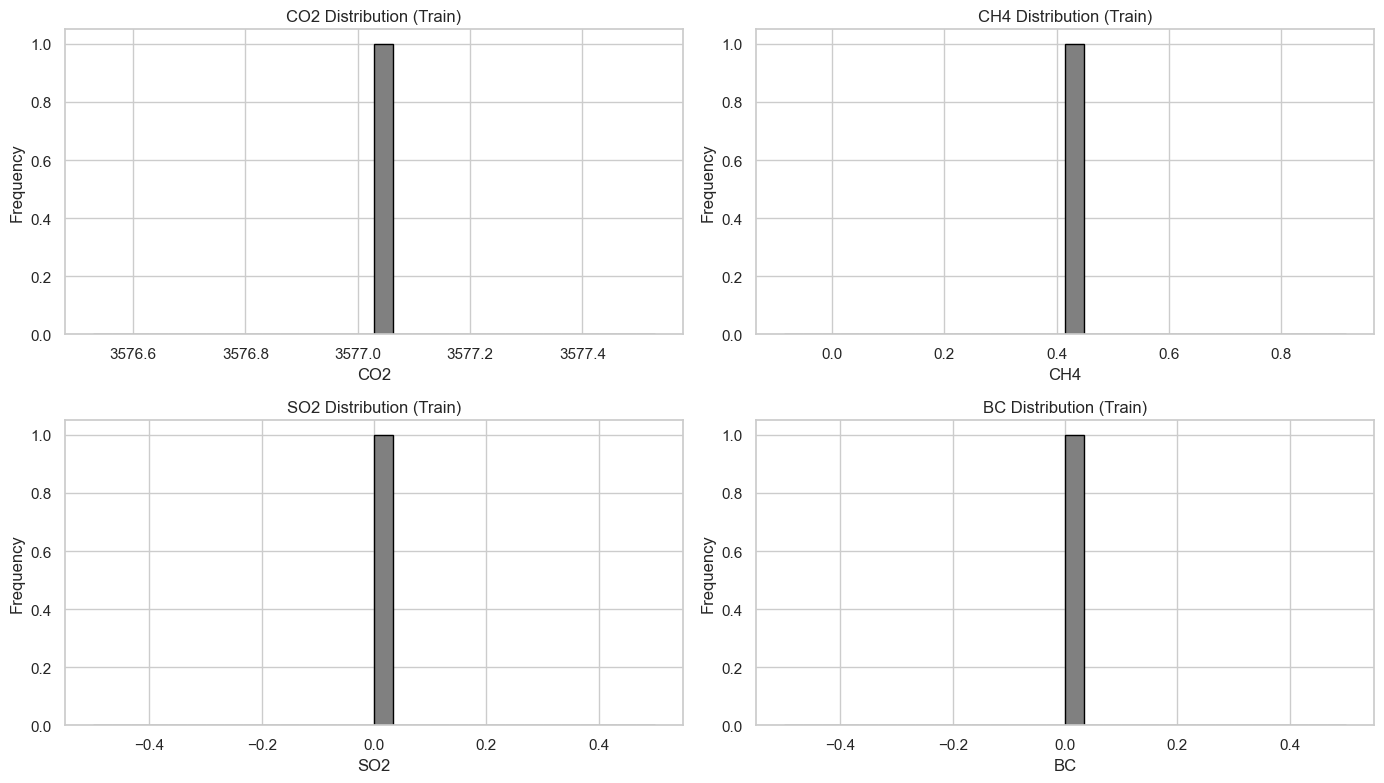

TypeError: float() argument must be a string or a real number, not 'cftime._cftime.DatetimeNoLeap'

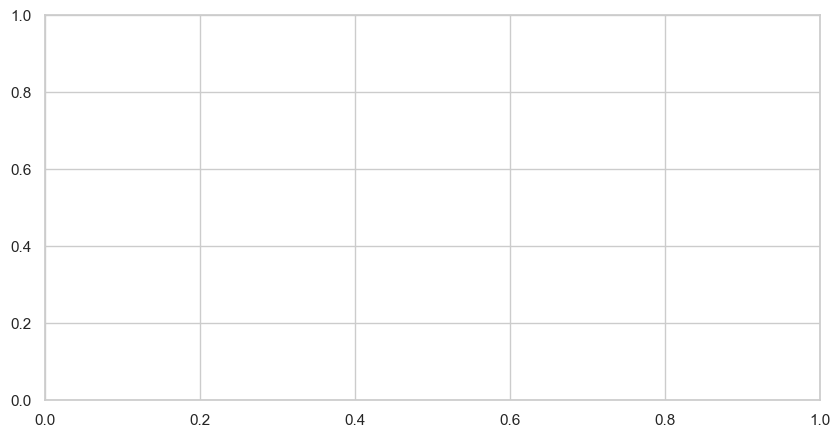

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cftime

def convert_time(data):
    units = data.time.attrs.get('units')
    calendar = data.time.attrs.get('calendar', 'standard')
    times = data.time.values
    cftime_times = cftime.num2date(times, units=units, calendar=calendar)
    return data.assign_coords(time=("time", cftime_times))

# Convert time coordinate to cftime objects
# data = convert_time(data)

# --- Step 1: Define validation start time (last 10 years) for ssp370 ---
ssp370_time = data.sel(ssp="ssp370").time.values
val_start_index = len(ssp370_time) - 120  # 12 months × 10 years
val_start_time = ssp370_time[val_start_index]

# --- Step 2: Split the data ---
train_data = xr.concat([
    data.sel(ssp="ssp126"),
    data.sel(ssp="ssp585"),
    data.sel(ssp="ssp370").isel(time=slice(None, val_start_index))
], dim="time")

val_data = data.sel(ssp="ssp370").sel(time=slice(val_start_time, None))
test_data = data.sel(ssp="ssp245")

# --- Print dataset sizes ---
print(f"Train size: {train_data.time.size} time steps")
print(f"Validation size: {val_data.time.size} time steps")
print(f"Test size: {test_data.time.size} time steps")

print(f"Spatial dimensions: x={data.dims['x']}, y={data.dims['y']}")

# --- Q3: Distribution of target variables (tas, pr) in training data ---
tas_vals = train_data.tas.mean(dim=["member_id", "time"]).values.flatten()
pr_vals = train_data.pr.mean(dim=["member_id", "time"]).values.flatten()

print(f"TAS (train): mean={np.nanmean(tas_vals):.2f}, std={np.nanstd(tas_vals):.2f}")
print(f"PR (train): mean={np.nanmean(pr_vals):.2f}, std={np.nanstd(pr_vals):.2f}")

# --- Plot distributions ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(tas_vals[~np.isnan(tas_vals)], bins=30, color="tomato", edgecolor="black")
ax[0].set_title("Train Surface Temperature Distribution")
ax[0].set_xlabel("TAS (K)")
ax[0].set_ylabel("Frequency")
ax[1].hist(pr_vals[~np.isnan(pr_vals)], bins=30, color="skyblue", edgecolor="black")
ax[1].set_title("Train Precipitation Distribution")
ax[1].set_xlabel("PR (mm/day)")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- Q4: Distribution of input variables ---
input_vars = ['CO2', 'CH4', 'SO2', 'BC']
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.flatten()

for i, var in enumerate(input_vars):
    subset = train_data[var]
    # Check if lat/lon dims exist, average accordingly
    if {"latitude", "longitude"}.issubset(subset.dims):
        val = subset.mean(dim=["time", "latitude", "longitude"]).values.flatten()
    else:
        val = subset.mean(dim="time").values.flatten()

    axs[i].hist(val[~np.isnan(val)], bins=30, color='gray', edgecolor='black')
    axs[i].set_title(f"{var} Distribution (Train)")
    axs[i].set_xlabel(var)
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# --- Q5: Distribution changes over time and SSP for TAS ---
# Average spatial dims and member_id for each ssp
tas_means = data.sel(ssp=["ssp126", "ssp370", "ssp585"]).mean(dim=["x", "y", "member_id"])

fig, ax = plt.subplots(figsize=(10, 5))
for ssp in ["ssp126", "ssp370", "ssp585"]:
    # Plot TAS time series with cftime datetime axis
    times = tas_means.sel(ssp=ssp).time.values
    tas_vals = tas_means.sel(ssp=ssp).tas.values
    ax.plot(times, tas_vals, label=ssp)

ax.set_title("Global Mean Surface Temperature Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("TAS (K)")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Additional visualization: Train / Val / Test time coverage ---

plt.figure(figsize=(12, 3))
plt.eventplot([
    train_data.time.values,
    val_data.time.values,
    test_data.time.values
], colors=['green', 'orange', 'blue'], lineoffsets=[3, 2, 1], linelengths=0.7)

plt.yticks([3, 2, 1], ['Train', 'Validation', 'Test'])
plt.xlabel("Time")
plt.title("Time Coverage of Train, Validation, and Test Splits")
plt.tight_layout()
plt.show()


In [21]:
print(data.time)
print(data.time.dtype)
print(type(data.time.values[0]))


<xarray.DataArray 'time' (time: 1021)> Size: 8kB
array([    0,    31,    59, ..., 30964, 30994, 31025], dtype=int64)
Coordinates:
  * time     (time) int64 8kB 0 31 59 90 120 ... 30903 30933 30964 30994 31025
Attributes:
    calendar:  noleap
    units:     days since 2015-01-15
int64
<class 'numpy.int64'>
